In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

print(sns.__version__)

0.13.1


In [4]:
data = pd.read_csv('../data/Titanic-Dataset.csv')

In [5]:
data['Pclass'] = data['Pclass'].astype('object')

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='count', ylabel='Sex'>

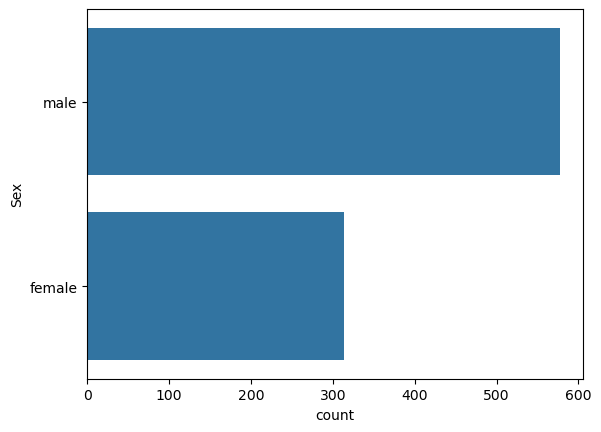

In [4]:
sns.countplot(data, y="Sex")

<Axes: xlabel='percent', ylabel='Sex'>

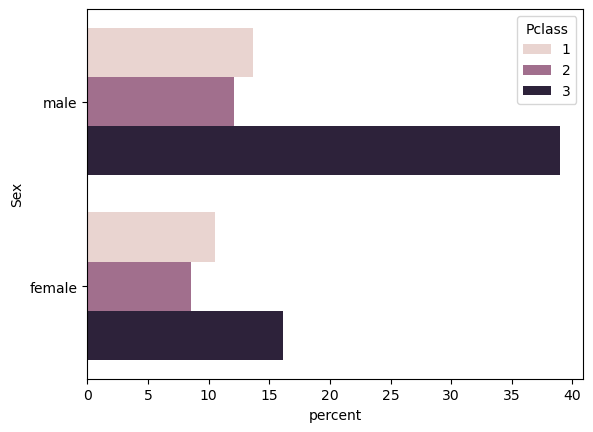

In [5]:
sns.countplot(data, y="Sex", hue='Pclass', stat='percent')

<Axes: xlabel='Sex', ylabel='percent'>

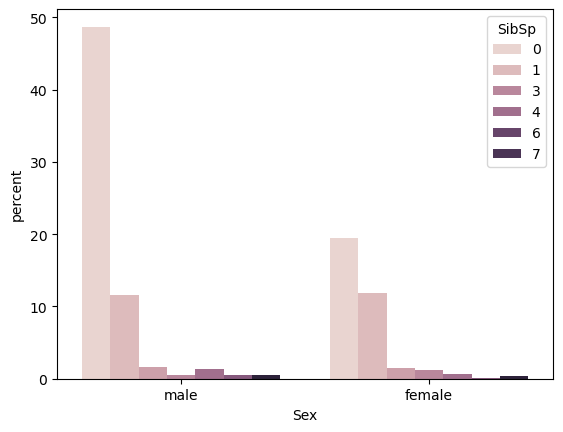

In [7]:
sns.countplot(data, x="Sex", hue='SibSp', stat='percent')

<Axes: xlabel='Age', ylabel='Count'>

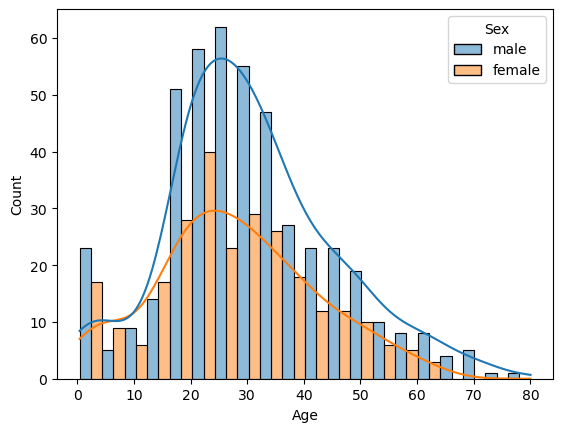

In [9]:
sns.histplot(data, x='Age', hue='Sex', multiple='dodge', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

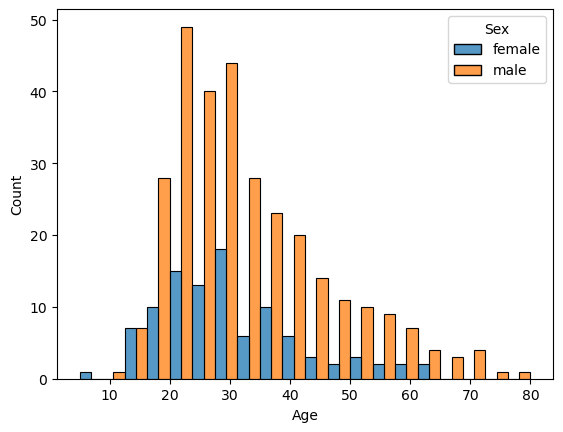

In [13]:
sns.histplot(data[(data['SibSp'] == 0) & (data['Parch']==0)].dropna(subset='Age'), x='Age', hue='Sex', multiple='dodge', bins=20)

<Axes: xlabel='Age', ylabel='Count'>

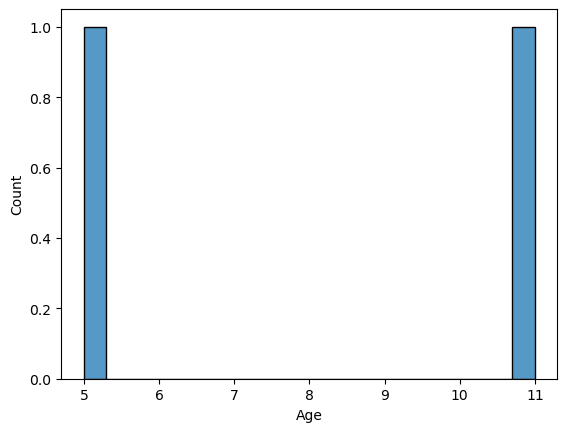

<Axes: xlabel='Age', ylabel='Count'>

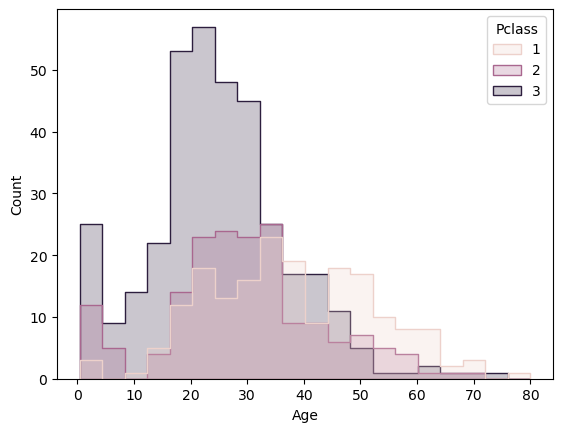

In [13]:
sns.histplot(data, x='Age', hue='Pclass', element='step')

In [29]:
ticket_count = pd.DataFrame(data['Ticket'].value_counts()).reset_index().rename({'index':'Ticket','Ticket':'ticket_count'}, axis=1)
ticket_count

data = data.merge(ticket_count, on='Ticket', how='left')

<Axes: xlabel='Age', ylabel='Count'>

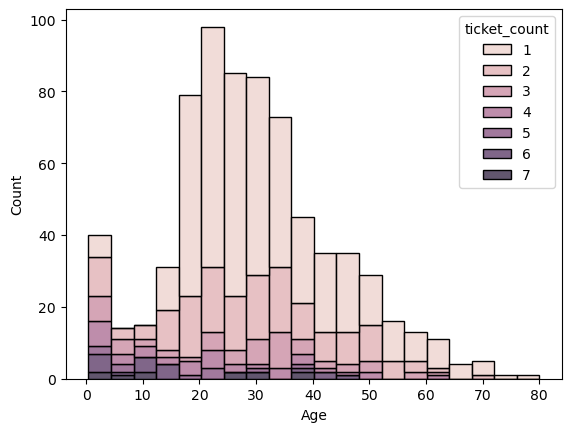

In [31]:
sns.histplot(data, x='Age', hue='ticket_count',multiple='stack')

<Axes: xlabel='Pclass', ylabel='count'>

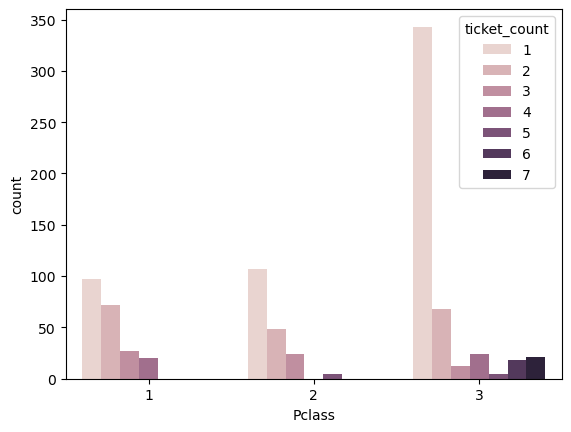

In [32]:
sns.countplot(data, x='Pclass', hue='ticket_count')

<Axes: xlabel='Pclass', ylabel='count'>

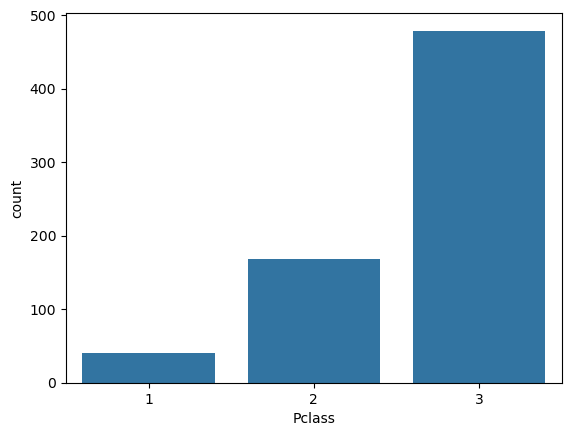

In [44]:
sns.countplot(data[data['Cabin'].isna()], x = 'Pclass')